# Bolsa Tool

**Streamlit:** https://docs.streamlit.io/

**Datareader:** https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

**Ciberpunk:** https://github.com/dhaitz/mplcyberpunk

**Prophet:** https://facebook.github.io/prophet/docs/quick_start.html

Crearemos una aplicación para poder ver acciones en bolsa

Importamos librerías

In [1]:
import streamlit as st
import pandas as pd
import pandas_datareader.data as web
import datetime
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplcyberpunk
import numpy as np
from prophet import Prophet

In [2]:
"""pip install pandas-datareader
pip install mplcyberpunk
python -m pip install prophet
conda install -c conda-forge prophet (recomendada por él)
"""

'pip install pandas-datareader\npip install mplcyberpunk\npython -m pip install prophet\nconda install -c conda-forge prophet (recomendada por él)\n'

In [3]:
#%pip install yfinance


In [4]:
import yfinance as yf

# crear lista de acciones
portfolio = ['APPL', 'MSFT', 'TSLA', 'META', 'GOOG', 'NFLX', 'SPOT', '^GSPC', '^IXIC']
# Obtener datos históricos de una acción
data = yf.download('^IXIC', start='2021-01-01', end=None)

data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,12958.519531,12958.719727,12543.240234,12698.450195,12698.450195,6636170000
2021-01-05,12665.650391,12828.269531,12665.650391,12818.959961,12818.959961,6971860000
2021-01-06,12666.150391,12909.629883,12649.990234,12740.790039,12740.790039,7689880000
2021-01-07,12867.339844,13090.910156,12867.339844,13067.480469,13067.480469,6841480000
2021-01-08,13160.219727,13208.089844,13036.549805,13201.980469,13201.980469,7289390000
...,...,...,...,...,...,...
2024-06-04,16823.880859,16891.869141,16750.390625,16857.050781,16857.050781,4917350000
2024-06-05,16974.480469,17187.919922,16955.560547,17187.900391,17187.900391,5325000000
2024-06-06,17204.869141,17235.730469,17123.589844,17173.119141,17173.119141,4960580000


# Yahoo Finance

In [5]:
# get all stock info
msft = yf.Ticker('MSFT')
msft

yfinance.Ticker object <MSFT>

In [6]:
# get historical market data
hist = msft.history(period="1mo")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-13 00:00:00-04:00,417.257382,417.596766,410.080325,412.975098,15440200,0.00,0.0
2024-05-14 00:00:00-04:00,411.278163,416.738316,410.809008,415.809998,15109300,0.00,0.0
2024-05-15 00:00:00-04:00,417.899994,423.809998,417.269989,423.079987,22239500,0.75,0.0
2024-05-16 00:00:00-04:00,421.799988,425.420013,420.350006,420.989990,17530100,0.00,0.0
2024-05-17 00:00:00-04:00,422.540009,422.920013,418.029999,420.209991,15352200,0.00,0.0


In [7]:
# show meta information about the history (requires history() to be called first)
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1718211733,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 439.6,
 'fiftyTwoWeekHigh': 439.69,
 'fiftyTwoWeekLow': 433.25,
 'regularMarketDayHigh': 439.69,
 'regularMarketDayLow': 433.25,
 'regularMarketVolume': 9246929,
 'chartPreviousClose': 414.74,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'end': 1718199000,
   'start': 1718179200,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'end': 1718222400,
   'start': 1718199000,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'end': 1718236800,
   'start': 1718222400,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10

In [8]:
# show actions
msft.actions

,Dividends,Stock Splits
Date,,
2024-05-15 00:00:00-04:00,0.75,0.0


In [9]:
#show dividends
msft.dividends


Date
2024-05-15 00:00:00-04:00    0.75
Name: Dividends, dtype: float64

In [10]:
#show splits
msft.splits

Series([], Name: Stock Splits, dtype: float64)

In [11]:
#show capital gains
msft.capital_gains  # only for mutual funds & etfs

[]

In [12]:
# show share count
msft.get_shares_full(start="2022-01-01", end=None)

2022-01-27 00:00:00-05:00    7496869888
2022-02-04 00:00:00-05:00    7800719872
2022-02-05 00:00:00-05:00    7496869888
2022-02-11 00:00:00-05:00    7496869888
2022-03-04 00:00:00-05:00    7605040128
                                ...    
2024-05-31 00:00:00-04:00    7432309760
2024-05-31 00:00:00-04:00    7698290176
2024-06-01 00:00:00-04:00    7432309760
2024-06-05 00:00:00-04:00    7432309760
2024-06-11 00:00:00-04:00    7432309760
Length: 195, dtype: int64

In [41]:
# show financials by year:
# - income statement
msft.income_stmt.head()


,2023-06-30,2022-06-30,2021-06-30,2020-06-30,2019-06-30
Tax Effect Of Unusual Items,-2850000.0,43420000.0,180160797.164637,4760000.0,NaN
Tax Rate For Calcs,0.19,0.13,0.138266,0.17,NaN
Normalized EBITDA,105155000000.0,99905000000.0,83831000000.0,68395000000.0,NaN
Total Unusual Items,-15000000.0,334000000.0,1303000000.0,28000000.0,NaN
Total Unusual Items Excluding Goodwill,-15000000.0,334000000.0,1303000000.0,28000000.0,NaN


In [40]:
# show financials by quarterly
# - income statement
msft.quarterly_income_stmt.head()

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,-33660000.0,-29160000.0,-20700000.0,20855987.382214,30780000.0,NaN
Tax Rate For Calcs,0.18,0.18,0.18,0.187892,0.19,NaN
Normalized EBITDA,33741000000.0,33556000000.0,31845000000.0,28972000000.0,26556000000.0,NaN
Total Unusual Items,-187000000.0,-162000000.0,-115000000.0,111000000.0,162000000.0,NaN
Total Unusual Items Excluding Goodwill,-187000000.0,-162000000.0,-115000000.0,111000000.0,162000000.0,NaN


In [44]:
# - balance sheet
msft.balance_sheet.head(10)

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
Invested Capital,253460000000.0,216323000000.0,200134000000.0,181631000000.0
Working Capital,80108000000.0,74602000000.0,95749000000.0,109605000000.0
Net Tangible Assets,128971000000.0,87720000000.0,84477000000.0,67915000000.0
Capital Lease Obligations,12728000000.0,11489000000.0,9629000000.0,7671000000.0
Common Stock Equity,206223000000.0,166542000000.0,141988000000.0,118304000000.0


In [16]:
# - balance sheet by quarterly
msft.quarterly_balance_sheet.head()

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Ordinary Shares Number,7433000000.0,7431612107.0,7431000000.0,7432000000.0,7437000000.0,NaN
Share Issued,7433000000.0,7431612107.0,7431000000.0,7432000000.0,7437000000.0,NaN
Net Debt,45808000000.0,56914000000.0,NaN,12533000000.0,21648000000.0,32470000000.0
Total Debt,79911000000.0,88374000000.0,84989000000.0,59965000000.0,60522000000.0,NaN
Tangible Book Value,105161000000.0,89441000000.0,144029000000.0,128971000000.0,116864000000.0,NaN


In [17]:
# - cash flow statement
msft.cashflow.head()

,2023-06-30,2022-06-30,2021-06-30,2020-06-30,2019-06-30
Free Cash Flow,59475000000.0,65149000000.0,56118000000.0,45234000000.0,NaN
Repurchase Of Capital Stock,-22245000000.0,-32696000000.0,-27385000000.0,-22968000000.0,NaN
Repayment Of Debt,-2750000000.0,-9023000000.0,-3750000000.0,-5518000000.0,NaN
Issuance Of Debt,NaN,NaN,NaN,0.0,0.0
Issuance Of Capital Stock,1866000000.0,1841000000.0,1693000000.0,1343000000.0,NaN


In [18]:
# - cash flow statement
msft.quarterly_cashflow.head()
# see `Ticker.get_income_stmt()` for more options

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31,2022-09-30
Free Cash Flow,20965000000.0,9118000000.0,20666000000.0,19827000000.0,17834000000.0,NaN,NaN
Repurchase Of Capital Stock,-4213000000.0,-4000000000.0,-4831000000.0,-5704000000.0,-5509000000.0,NaN,NaN
Repayment Of Debt,-11589000000.0,-2916000000.0,-1500000000.0,-1000000000.0,0.0,NaN,NaN
Issuance Of Debt,6352000000.0,10773000000.0,25765000000.0,NaN,0.0,0.0,NaN
Issuance Of Capital Stock,522000000.0,261000000.0,685000000.0,512000000.0,536000000.0,NaN,NaN


In [19]:
msft.get_income_stmt().head(10)

,2023-06-30,2022-06-30,2021-06-30,2020-06-30,2019-06-30
TaxEffectOfUnusualItems,-2850000.0,43420000.0,180160797.164637,4760000.0,NaN
TaxRateForCalcs,0.19,0.13,0.138266,0.17,NaN
NormalizedEBITDA,105155000000.0,99905000000.0,83831000000.0,68395000000.0,NaN
TotalUnusualItems,-15000000.0,334000000.0,1303000000.0,28000000.0,NaN
TotalUnusualItemsExcludingGoodwill,-15000000.0,334000000.0,1303000000.0,28000000.0,NaN
NetIncomeFromContinuingOperationNetMinorityInterest,72361000000.0,72738000000.0,61271000000.0,44281000000.0,NaN
ReconciledDepreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0,NaN
ReconciledCostOfRevenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0,NaN
EBITDA,105140000000.0,100239000000.0,85134000000.0,68423000000.0,NaN
EBIT,91279000000.0,85779000000.0,73448000000.0,55627000000.0,NaN


In [20]:
# show holders
msft.major_holders

,Breakdown,Unnamed: 1
0,0.05%,% of Shares Held by All Insider
1,73.68%,% of Shares Held by Institutions
2,73.72%,% of Float Held by Institutions
3,6861,Number of Institutions Holding Shares


In [21]:
# show holders
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Group Inc,667.99M,2024-03-31,0.0899,293647105981
1,Blackrock Inc.,546.02M,2024-03-31,0.0735,240030333349
2,State Street Corporation,300.35M,2024-03-31,0.0404,132035721780
3,"FMR, LLC",220.86M,2024-03-31,0.0297,97089923709
4,"Geode Capital Management, LLC",157.59M,2024-03-31,0.0212,69275983810
5,Price (T.Rowe) Associates Inc,142.2M,2024-03-31,0.0191,62511421114
6,JP Morgan Chase & Company,127.74M,2024-03-31,0.0172,56155011198
7,Morgan Stanley,122.19M,2024-03-31,0.0164,53713457818
8,Norges Bank Investment Management,95.52M,2023-12-31,0.0129,41991418591
9,Capital International Investors,83.57M,2024-03-31,0.0112,36737842882


In [22]:
"""# show holders
msft.insider_transactions
msft.insider_purchases
msft.insider_roster_holders"""

# show holders
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,233.56M,2024-03-31,0.0314,102671952717
1,Vanguard 500 Index Fund,187.25M,2024-03-31,0.0252,82315889345
2,Fidelity 500 Index Fund,89.99M,2024-04-30,0.0121,39561795955
3,SPDR S&P 500 ETF Trust,87.91M,2024-04-30,0.0118,38646286740
4,iShares Core S&P 500 ETF,76.52M,2024-04-30,0.0103,33639269487
5,Vanguard Growth Index Fund,69.83M,2024-03-31,0.0094,30699104195
6,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",54.14M,2024-04-30,0.0073,23800850785
7,Vanguard Institutional Index Fund-Institutiona...,48.87M,2024-03-31,0.0066,21481073640
8,Growth Fund Of America Inc,40.58M,2024-03-31,0.0055,17840873913
9,Vanguard Information Technology Index Fund,40.07M,2024-02-29,0.0054,17615195579


In [23]:
'''# show recommendations
msft.recommendations

msft.recommendations_summary

msft.upgrades_downgrades

#YFNotImplementedError: Have not implemented fetching 'recommendations' from Yahoo API'''

"# show recommendations\nmsft.recommendations\n\nmsft.recommendations_summary\n\nmsft.upgrades_downgrades\n\n#YFNotImplementedError: Have not implemented fetching 'recommendations' from Yahoo API"

In [24]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2025-04-23 16:00:00-04:00,NaN,NaN,NaN
2025-01-28 16:00:00-05:00,NaN,NaN,NaN
2024-12-06 11:00:00-05:00,NaN,NaN,NaN
2024-10-22 06:00:00-04:00,NaN,NaN,NaN
2024-07-23 06:00:00-04:00,2.93,NaN,NaN
2024-06-06 13:00:00-04:00,NaN,NaN,NaN
2024-05-29 13:00:00-04:00,NaN,NaN,NaN
2024-05-21 08:00:00-04:00,2.60,2.71,0.0423
2024-04-25 16:00:00-04:00,2.82,2.94,0.0432


In [25]:
# show news
msft.news

[{'uuid': '75cbff4e-35a3-361e-9a85-91b895d21cba',
  'title': 'Apple Stock Hits Record High As AI-Driven iPhone Upgrade Cycle Forecast',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/75cbff4e-35a3-361e-9a85-91b895d21cba/apple-stock-hits-record-high.html',
  'providerPublishTime': 1718208147,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/2ir8KAEJB5obl7F71p4mbA--~B/aD01NjM7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/388389f67246ec5d896b740f5d6312e0',
     'width': 1000,
     'height': 563,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/AjJipUcpA.oktMNak6RTFw--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/388389f67246ec5d896b740f5d6312e0',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['AAPL', 'MSFT']},
 {'uuid': '5e266ef3-67cb-3e27-8dc6-75b6e6e6d537',
  'title': 'Microsoft, 

## Multiple tickers

In [26]:
"""tickers = yf.Tickers('msft aapl goog')

# access each ticker using (example)
tickers.tickers['MSFT'].info
tickers.tickers['AAPL'].history(period="1mo")
tickers.tickers['GOOG'].actions"""

'tickers = yf.Tickers(\'msft aapl goog\')\n\n# access each ticker using (example)\ntickers.tickers[\'MSFT\'].info\ntickers.tickers[\'AAPL\'].history(period="1mo")\ntickers.tickers[\'GOOG\'].actions'

In [27]:
data = yf.download("SPY AAPL", period="1mo")
data.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2024-05-13  186.279999  520.909973  186.279999  520.909973  187.100006   
2024-05-14  187.429993  523.299988  187.429993  523.299988  188.300003   
2024-05-15  189.720001  529.780029  189.720001  529.780029  190.649994   
2024-05-16  189.839996  528.690002  189.839996  528.690002  191.100006   
2024-05-17  189.869995  529.450012  189.869995  529.450012  190.809998   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2024-05-13  522.669983  184.619995  519.739990  185.440002  522.559998   
2024-05-14  523.830017  186.289993  520.559998  187.509995  521.109985   
2024-05-15  530.080017  187.369995  525.179993  187.910004  525.830017   
2024-05-16  531.520020  189.660004  528.539978  190.470001  529.880005   
2024-05-17  529.520020  189.179993  527.320007  189.509995  528.809998   

              Volume            
                AAPL       SPY  
Date                            
2024-05-13  72044800  36716400  
2024-05-14  52393600  57535900  
2024-05-15  70400000  59504900  
2024-05-16  52845200  50244800  
2024-05-17  41282900  59187600

### Estilo

In [28]:
plt.style.use("dark_background")

### Funciones principales

In [29]:
import yfinance as yf

def get_data(stock, start_time, end_time):
    data = yf.download(stock, start=start_time, end=end_time)
    return data


In [30]:
#es para obtener los niveles de fibonacci

def get_levels(dfvar):
    
    def isSupport(df,i):
        support = df['low'][i] < df['low'][i-1]  and df['low'][i] < df['low'][i+1] and df['low'][i+1] < df['low'][i+2] and df['low'][i-1] < df['low'][i-2]
        return support

    def isResistance(df,i):
        resistance = df['high'][i] > df['high'][i-1]  and df['high'][i] > df['high'][i+1] and df['high'][i+1] > df['high'][i+2] and df['high'][i-1] > df['high'][i-2]
        return resistance
    
    def isFarFromLevel(l, levels, s):
        level = np.sum([abs(1-x[0]) < s for x in levels])
        return level == 0
    
    df = dfvar.copy()
    df.rename(columns = {"High": "high", "Low": "low"}, inplace = True)
    s = np.mean(df["high"] - df["low"])
    levels = []
    for i in range(2, df.shape[0] - 2):
        if isSupport(df, i):
            levels.append((i, df["low"][i]))
        elif isResistance(df, i):
            levels.append((i, df["high"][i]))
            
    filter_levels = []
    for i in range(2, df.shape[0] - 2):
        if isSupport(df, i):
            l = df["low"][i]
            if isFarFromLevel(l, levels, s):
                filter_levels.append((i,l))
                
    return filter_levels
    

In [31]:
def plot_close_price(data):
    
    
    levels = get_levels(data)
    df_levels = pd.DataFrame(levels, columns = ["index", "close"])
    df_levels.set_index("index", inplace = True)
    max_level = df_levels.idxmax()
    min_level = df_levels.idxmin()
    
    #ratios de fibonacci
    ratios = [0, 0.236, 0.328, 0.5, 0.618, 0.786, 1]
    
    #los ploteo
    # los ploteo
    if min_level.close > max_level.close:
        trend = "down"
        fib_levels = [data.Close.iloc[max_level.close] - (data.Close.iloc[max_level.close] - data.Close.iloc[min_level.close]) * ratio for ratio in ratios]
        idx_level = max_level
    else:
        trend = "up"
        fib_levels = [data.Close.iloc[min_level.close] + (data.Close.iloc[max_level.close] - data.Close.iloc[min_level.close]) * ratio for ratio in ratios]
        idx_level = min_level

        
    background = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    logo = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    font = {"family":"sans-serif",
            "color": "white",
            "size": 16,
            }
    
    font_sub = {"family":"sans-serif",
                "color": "white",
                "weight": "normal",
                "size": 10,
                }
    
    fig = plt.figure(figsize=(10,6))
    plt.plot(data.index, data.Close, color = "darkorange", linewidth = 1)
    mplcyberpunk.add_glow_effects()
    for level, ratio in zip(fib_levels, ratios):
        plt.hlines(level, xmin=data.index[0], xmax=data.index[-1], colors="snow", linestyles="dotted", linewidth=0.9, label="{:.1f}%".format(ratio*100))

        
        
    plt.ylabel("Precio USD")
    plt.xticks(rotation = 45, ha="right")
    ax = plt.gca()
    #ax.figure.figimage(logo, 10, 1000, alpha=.99, zorder=1)
    ax.figure.figimage(background, 40, 40, alpha=.15, zorder=1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.grid(True, color="gray", linestyle="-", linewith=0.2)
    return fig
    
def daily_returns(df):
    df = df.sort_index(ascending=True)
    df["returns"] = np.log(df["Close"]).diff()
    return df

def returns_vol(df):
    df["volatility"] = df.returns.rolling(12).std()
    return df

def plot_volatility(df_vol):
    background = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    logo = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    font = {"family":"sans-serif",
            "color": "white",
            "weight":"normal",
            "size":16,
            }
    
    font_sub = {"family":"sans-serif",
                "color":"white",
                "weight":"normal",
                "size":10
                }
    
    df_plot = df_vol.copy()
    fig = plt.figure(figsize=(10,6))
    plt.plot(df_plot.index, df_plot.returns, color= "darkorange", linewidth=0.5)
    plt.plot(df_plot.index, df_plot.volatility, color="darkorange", linewidth=1)
    mplcyberpunk.add_glow_effects()
    plt.ylabel("% Porcentaje")
    plt.xticks(rotation= 45, ha="right")
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.3f}"))
    # ax.figure.figimage(logo, 10, 100, alpha=.99, zorder=1)
    ax.figure.figimage(background, 40, 40, alpha = .15, zorder=1)
    ax.spines["top"].set.visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.grid(True, color="gray", linestyle="-", linewidth=0.2)
    plt.legend(("Retornos Diarios", "Volatilidad Móvil"), frameon = False)
    return fig

def plot_prophet(data, n_forecast=365):
    data_prophet = data.reset_index().copy()
    data_prophet.rename(columns={"Date": "ds", "Close":"y"}, inplace=True)
    
    m = Prophet()
    m.fit(data_prophet[["ds", "y"]])
    
    future = m.make_future_dataframe(periods=n_forecast)
    forecast = m.predict(future)
    print(forecast.columns)
    fig1 = m.plot(forecast)
    background = plt.imread("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
    mplcyberpunk.add_glow_effects()
    ax = plt.gca()
    ax.figure.figimage(background, 40, 40, alpha=.15, zorder=1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.grid(True, color="gray", linestyle="-", linewidth=0.4)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Precio de Cierre")
    plt.plot(forecast.ds, forecast.yhat, color="darkorange", linewidth=0.5)
    return fig1
    
    

### LAYOUT - Sidebar

In [32]:

logo_pypro = Image.open("./images/Leonardo_Diffusion_Generate_a_captivating_and_professional_log_1.jpg")
with st.sidebar:
    st.image(logo_pypro)
    stock = st.selectbox("Ticker", ["NVDA", "TSLA", "MSFT", "AMZN", "INTC", "AMD", "JNJ", "BABA", "GOOGL", "QCOM"])
    start_time = st.date_input(
        "Fecha de Inicio",
        datetime.date(2019, 7, 6))
    end_time = st.date_input(
        "Fecha Final",
        datetime.date(2023, 10, 6))
    periods = st.number_input("Periodos Forecast", value = 365, min_value=1, max_value=5000)
    

2024-06-12 19:02:17.308 
  command:

    streamlit run c:\Users\GAMM\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


### DATA - Funciones sobre inputs

[*********************100%***********************]  1 of 1 completed


ValueError: keyword grid_linewith is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

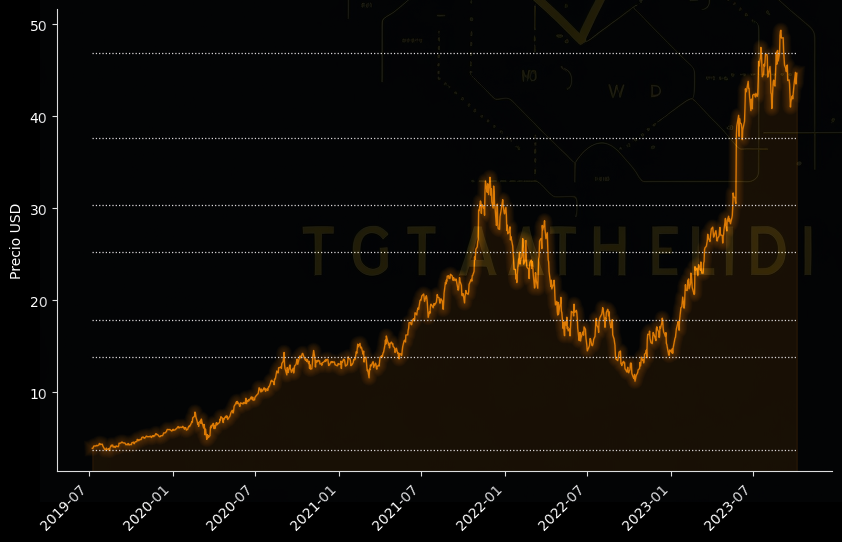

In [33]:
data = get_data(stock, start_time.strftime("%Y-%m-%d"), end_time.strftime("%Y-%m-%d"))
plot_price = plot_close_price(data)

df_ret = daily_returns(data)
df_vol = returns_vol(df_ret)
plot_vol = plot_volatility(df_vol)

plot_forecast = plot_prophet(data, periods)

### LAYOUT - Render Final

In [ ]:
#nombre de la aplicación
st.title("Análisis de Acciones")

st.subheader( "Precio de Cierre - Fibonacci")

#el método de pyplot de streamlit siempre recibe una figura
st.pyplot("Forecast a Un Año - prophet")
st.pyplot(plot_forecast)

st.subheader("Retornos Diarios")
st.pyplot(plot_vol)

st.dataframe(data)

AttributeError: 'str' object has no attribute 'savefig'